# Seattle Accident Severity    
### Data Science Capstone Project

## Introduction / Business Problem

Predictions are a way of life in our busy schedules. We check the weather and it always seems to be a 50% chance of rain, especially in the Greater Seattle Washington area. There is even a section of the news that covers traffic. But it is limited to letting you know if a traffic accident has occurred. What if we can predict accidents, in addiction the severity of these accidents. Better yet why not deploy measures to avoid or even reduce the number and severity of accidents.

This project will look at data provided by the Seattle Police Department and made available by the Seattle Department of Transportation. We will look at this data, and see if we can use it to predict the severity of accidents. Using the attributes in the data set we will examine different forms of data science tools to check if machine learning can aid in this question.

In the next section we look at the data and examine the attributes that will be the most useful.

## The Data Set

Let us import the library's to examine the data set.

In [1]:
import numpy as np
import pandas as pd

Now import the the data set into a data frame called df and look at the first 5 rows.

In [2]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", header = 0, low_memory = False)
df.head()

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 38 columns]

The next lines of code will execute the a statistical analysis of the columns, the number of rows and columns, and finally the type of data in the columns.

In [3]:
df.describe()

SEVERITYCODE              X              Y       OBJECTID  \
count  194673.000000  189339.000000  189339.000000  194673.000000   
mean        1.298901    -122.330518      47.619543  108479.364930   
std         0.457778       0.029976       0.056157   62649.722558   
min         1.000000    -122.419091      47.495573       1.000000   
25%         1.000000    -122.348673      47.575956   54267.000000   
50%         1.000000    -122.330224      47.615369  106912.000000   
75%         2.000000    -122.311937      47.663664  162272.000000   
max         2.000000    -122.238949      47.734142  219547.000000   

              INCKEY      COLDETKEY         INTKEY  SEVERITYCODE.1  \
count  194673.000000  194673.000000   65070.000000   194673.000000   
mean   141091.456350  141298.811381   37558.450576        1.298901   
std     86634.402737   86986.542110   51745.990273        0.457778   
min      1001.000000    1001.000000   23807.000000        1.000000   
25%     70383.000000   70383.000000   28667.000000        1.000000   
50%    123363.000000  123363.000000   29973.000000        1.000000   
75%    203319.000000  203459.000000   33973.000000        2.000000   
max    331454.000000  332954.000000  757580.000000        2.000000   

         PERSONCOUNT       PEDCOUNT    PEDCYLCOUNT       VEHCOUNT  \
count  194673.000000  194673.000000  194673.000000  194673.000000   
mean        2.444427       0.037139       0.028391       1.920780   
std         1.345929       0.198150       0.167413       0.631047   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       2.000000   
50%         2.000000       0.000000       0.000000       2.000000   
75%         3.000000       0.000000       0.000000       2.000000   
max        81.000000       6.000000       2.000000      12.000000   

        SDOT_COLCODE    SDOTCOLNUM     SEGLANEKEY  CROSSWALKKEY  
count  194673.000000  1.149360e+05  194673.000000  1.946730e+05  
mean       13.867768  7.972521e+06     269.401114  9.782452e+03  
std         6.868755  2.553533e+06    3315.776055  7.226926e+04  
min         0.000000  1.007024e+06       0.000000  0.000000e+00  
25%        11.000000  6.040015e+06       0.000000  0.000000e+00  
50%        13.000000  8.023022e+06       0.000000  0.000000e+00  
75%        14.000000  1.015501e+07       0.000000  0.000000e+00  
max        69.000000  1.307202e+07  525241.000000  5.239700e+06

In [4]:
df.shape

(194673, 38)

In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

There are 194673 rows of records, and 37 columns of attributes and 1 column with the output we are looking for. There are some columns that are not going to be useful.

We should check for missing values to determine the useful attributes.

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df.isnull().sum().to_frame()

0
SEVERITYCODE         0
X                 5334
Y                 5334
OBJECTID             0
INCKEY               0
COLDETKEY            0
REPORTNO             0
STATUS               0
ADDRTYPE          1926
INTKEY          129603
LOCATION          2677
EXCEPTRSNCODE   109862
EXCEPTRSNDESC   189035
SEVERITYCODE.1       0
SEVERITYDESC         0
COLLISIONTYPE     4904
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDATE              0
INCDTTM              0
JUNCTIONTYPE      6329
SDOT_COLCODE         0
SDOT_COLDESC         0
INATTENTIONIND  164868
UNDERINFL         4884
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
PEDROWNOTGRNT   190006
SDOTCOLNUM       79737
SPEEDING        185340
ST_COLCODE          18
ST_COLDESC        4904
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0

It's not easy to see the ones that should be dropped, let's try a bar graph

Total  Percentage
SEVERITYCODE      0         0.0
SEGLANEKEY        0         0.0
SDOT_COLDESC      0         0.0
SDOT_COLCODE      0         0.0
INCDTTM           0         0.0
INCDATE           0         0.0
VEHCOUNT          0         0.0
CROSSWALKKEY      0         0.0
PEDCOUNT          0         0.0
PERSONCOUNT       0         0.0

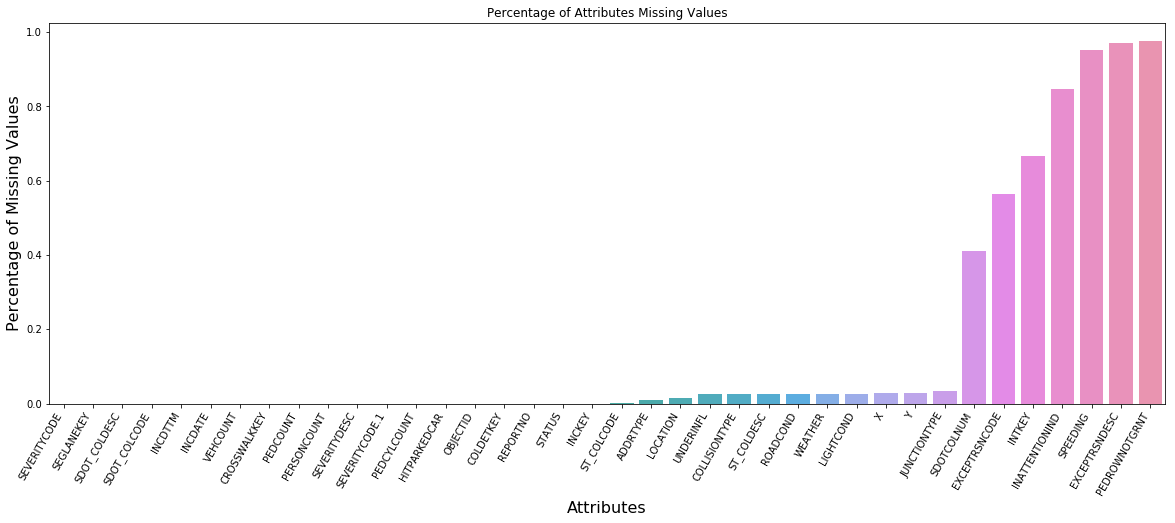

In [8]:
total = df.isnull().sum().sort_values()
percentage = (df.isnull().sum() / df.isnull().count()).sort_values()
missing_data = pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage'])
f, ax = plt.subplots(figsize = (20, 7))
sns.barplot(x = missing_data.index, y = missing_data['Percentage'])
plt.xticks(rotation = 60, horizontalalignment = 'right')
plt.xlabel('Attributes', fontsize = 16)
plt.ylabel('Percentage of Missing Values', fontsize = 16)
plt.title('Percentage of Attributes Missing Values')
missing_data.head(10)

Much better looks like we can drop attributes that are over well over 5%.

In [9]:
df.drop(['SDOTCOLNUM', 'EXCEPTRSNCODE', 'INTKEY', 'INATTENTIONIND', 'SPEEDING', 'PEDROWNOTGRNT'], axis = 1, inplace = True)

In [10]:
df.head()

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE                                     LOCATION  ...  \
0  Matched  Intersection                   5TH AVE NE AND NE 103RD ST  ...   
1  Matched         Block   AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N  ...   
2  Matched         Block  4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST  ...   
3  Matched         Block     2ND AVE BETWEEN MARION ST AND MADISON ST  ...   
4  Matched  Intersection              SWIFT AVE S AND SWIFT AV OFF RP  ...   

                                        SDOT_COLDESC  UNDERINFL   WEATHER  \
0  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...          N  Overcast   
1  MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...          0   Raining   
2       MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END          0  Overcast   
3  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...          N     Clear   
4  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...          0   Raining   

  ROADCOND                LIGHTCOND  ST_COLCODE  \
0      Wet                 Daylight          10   
1      Wet  Dark - Street Lights On          11   
2      Dry                 Daylight          32   
3      Dry                 Daylight          23   
4      Wet                 Daylight          10   

                                          ST_COLDESC  SEGLANEKEY CROSSWALKKEY  \
0                                  Entering at angle           0            0   
1  From same direction - both going straight - bo...           0            0   
2                             One parked--one moving           0            0   
3                   From same direction - all others           0            0   
4                                  Entering at angle           0            0   

  HITPARKEDCAR  
0            N  
1            N  
2            N  
3            N  
4            N  

[5 rows x 32 columns]

There are redundant location columns that can be removed because the x, y columns are the longitude and latitude respectively and provide this information. Also there are code values and values that are not useful so we will elimate these as well as dates.

In [11]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'EXCEPTRSNDESC', 'SEVERITYCODE.1',
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'],
      dtype='object')

In [12]:
df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC', 'PEDCOUNT', 'PEDCYLCOUNT', 'INCDATE', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'EXCEPTRSNDESC', 'SDOT_COLDESC', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY'], axis = 1, inplace = True)

In [13]:
df.head()

SEVERITYCODE           X          Y      ADDRTYPE COLLISIONTYPE  \
0             2 -122.323148  47.703140  Intersection        Angles   
1             1 -122.347294  47.647172         Block     Sideswipe   
2             1 -122.334540  47.607871         Block    Parked Car   
3             1 -122.334803  47.604803         Block         Other   
4             2 -122.306426  47.545739  Intersection        Angles   

   PERSONCOUNT  VEHCOUNT                 INCDTTM UNDERINFL   WEATHER ROADCOND  \
0            2         2    3/27/2013 2:54:00 PM         N  Overcast      Wet   
1            2         2   12/20/2006 6:55:00 PM         0   Raining      Wet   
2            4         3  11/18/2004 10:20:00 AM         0  Overcast      Dry   
3            3         3    3/29/2013 9:26:00 AM         N     Clear      Dry   
4            2         2    1/28/2004 8:04:00 AM         0   Raining      Wet   

                 LIGHTCOND HITPARKEDCAR  
0                 Daylight            N  
1  Dark - Street Lights On            N  
2                 Daylight            N  
3                 Daylight            N  
4                 Daylight            N

Now let's view what attributes we have left

In [14]:
df.isnull().sum()

SEVERITYCODE        0
X                5334
Y                5334
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
VEHCOUNT            0
INCDTTM             0
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
HITPARKEDCAR        0
dtype: int64

The longitude (x) and latitude (y) have the largest count of missing values but are needed for location information. The data missing is less than 3%, so I'm okay with dropping the values in these attibutes

In [15]:
df.dropna(subset = ["X", "Y"], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
df.isnull().sum()

SEVERITYCODE        0
X                   0
Y                   0
ADDRTYPE            0
COLLISIONTYPE    4757
PERSONCOUNT         0
VEHCOUNT            0
INCDTTM             0
UNDERINFL        4737
WEATHER          4925
ROADCOND         4858
LIGHTCOND        5012
HITPARKEDCAR        0
dtype: int64

Next is lighting conditions, let us evaluate if there is high frequecy over other values to replace the missing ones with

In [16]:
df['LIGHTCOND'].value_counts()

Daylight                    113582
Dark - Street Lights On      47314
Unknown                      12432
Dusk                          5775
Dawn                          2422
Dark - No Street Lights       1451
Dark - Street Lights Off      1152
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [17]:
df['LIGHTCOND'].isnull().sum()

5012

We can easily replace the missing data with Daylight as it dominates in the data set

In [18]:
df['LIGHTCOND'].replace(np.nan, "Daylight", inplace = True)

Next we should look at Weather and Road Conditions because these are useful attributes like Lighting Conditions

In [19]:
df['WEATHER'].value_counts()

Clear                       108959
Raining                      32015
Overcast                     27136
Unknown                      13893
Snowing                        894
Other                          773
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [20]:
df['WEATHER'].isnull().sum()

4925

In [21]:
df['WEATHER'].replace(np.nan, "Clear", inplace = True)

In [22]:
df['ROADCOND'].value_counts()

Dry               122076
Wet                46064
Unknown            13839
Ice                 1177
Snow/Slush           989
Other                117
Standing Water       102
Sand/Mud/Dirt         64
Oil                   53
Name: ROADCOND, dtype: int64

In [23]:
df['ROADCOND'].isnull().sum()

4858

In [24]:
df['ROADCOND'].replace(np.nan, "Dry", inplace = True)

In [25]:
df.isnull().sum()

SEVERITYCODE        0
X                   0
Y                   0
ADDRTYPE            0
COLLISIONTYPE    4757
PERSONCOUNT         0
VEHCOUNT            0
INCDTTM             0
UNDERINFL        4737
WEATHER             0
ROADCOND            0
LIGHTCOND           0
HITPARKEDCAR        0
dtype: int64

Finally we look at the last two attributes

In [26]:
df['COLLISIONTYPE'].value_counts()

Parked Car    46381
Angles        34460
Rear Ended    32968
Other         22277
Sideswipe     18034
Left Turn     13624
Pedestrian     6551
Cycles         5378
Right Turn     2912
Head On        1997
Name: COLLISIONTYPE, dtype: int64

In [27]:
df['UNDERINFL'].value_counts()

N    97639
0    78082
Y     5002
1     3879
Name: UNDERINFL, dtype: int64

These values are very specific to an occurance in the data, and no dominating value, so we will zero these out like the X and Y values

In [28]:
df.dropna(subset = ["COLLISIONTYPE", "UNDERINFL"], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
df.isnull().sum()

SEVERITYCODE     0
X                0
Y                0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
VEHCOUNT         0
INCDTTM          0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
HITPARKEDCAR     0
dtype: int64

In [29]:
df.replace("Unknown", np.nan, inplace = True)
df.head()

SEVERITYCODE           X          Y      ADDRTYPE COLLISIONTYPE  \
0             2 -122.323148  47.703140  Intersection        Angles   
1             1 -122.347294  47.647172         Block     Sideswipe   
2             1 -122.334540  47.607871         Block    Parked Car   
3             1 -122.334803  47.604803         Block         Other   
4             2 -122.306426  47.545739  Intersection        Angles   

   PERSONCOUNT  VEHCOUNT                 INCDTTM UNDERINFL   WEATHER ROADCOND  \
0            2         2    3/27/2013 2:54:00 PM         N  Overcast      Wet   
1            2         2   12/20/2006 6:55:00 PM         0   Raining      Wet   
2            4         3  11/18/2004 10:20:00 AM         0  Overcast      Dry   
3            3         3    3/29/2013 9:26:00 AM         N     Clear      Dry   
4            2         2    1/28/2004 8:04:00 AM         0   Raining      Wet   

                 LIGHTCOND HITPARKEDCAR  
0                 Daylight            N  
1  Dark - Street Lights On            N  
2                 Daylight            N  
3                 Daylight            N  
4                 Daylight            N

This will be the Data we will work with to complete the Project and answer the question presented at the beginning of the notebook.

## Methodology

Now we will make some relationships with the data we decided to work with, seaborn was already imported so we can start some exploration.

First look at the Severity to some of the data, Severity Codes are:
  1 = Property Damage, 2 = Injury.

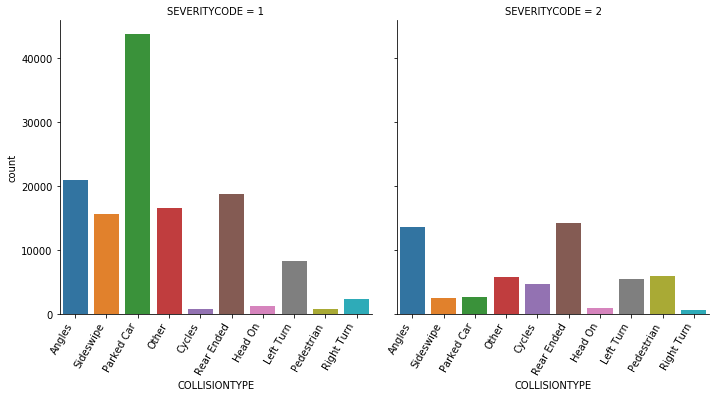

In [30]:
bar_coltype = sns.catplot(x = 'COLLISIONTYPE', data = df, kind = "count", col = 'SEVERITYCODE')
bar_coltype.set_xticklabels(rotation = 60, horizontalalignment = 'right')

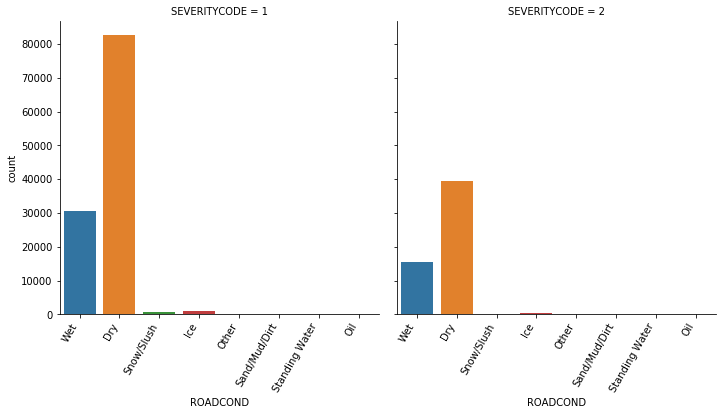

In [31]:
bar_rc = sns.catplot(x = 'ROADCOND', data = df, kind = "count", col = 'SEVERITYCODE')
bar_rc.set_xticklabels(rotation = 60, horizontalalignment = 'right')

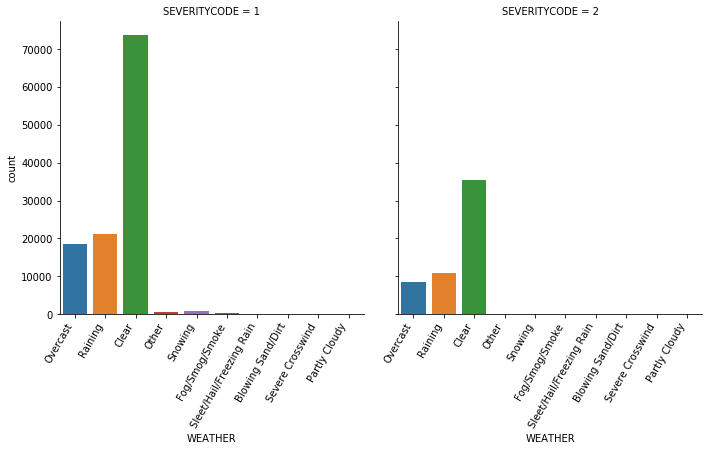

In [32]:
bar_weather = sns.catplot(x = 'WEATHER', data = df, kind = "count", col = 'SEVERITYCODE')
bar_weather.set_xticklabels(rotation = 60, horizontalalignment = 'right')

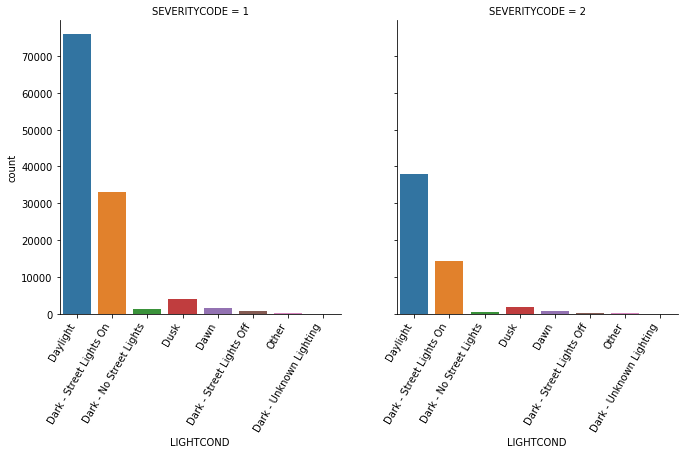

In [33]:
bar_lc = sns.catplot(x = 'LIGHTCOND', data = df, kind = "count", col = 'SEVERITYCODE')
bar_lc.set_xticklabels(rotation = 60, horizontalalignment = 'right')

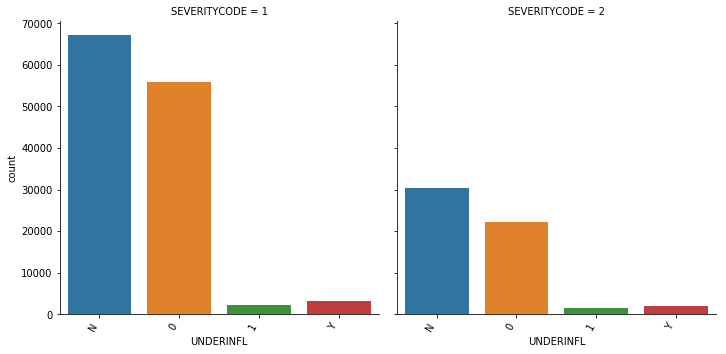

In [34]:
bar_ui = sns.catplot(x = 'UNDERINFL', data = df, kind = "count", col = 'SEVERITYCODE')
bar_ui.set_xticklabels(rotation = 60, horizontalalignment = 'right')

The data values show that there are some very relevent attributes to severity, Now we will look at the other attributes to better understand the dataset and the effect on persons involved

In [35]:
collisions = df.groupby('COLLISIONTYPE', axis = 0).sum()
collisions

SEVERITYCODE             X             Y  PERSONCOUNT  VEHCOUNT
COLLISIONTYPE                                                                 
Angles                48033 -4.215507e+06  1.641099e+06        93455     71540
Cycles                10090 -6.578954e+05  2.561449e+05        11444      5259
Head On                2859 -2.442923e+05  9.507742e+04         5450      4251
Left Turn             19006 -1.666626e+06  6.488239e+05        36837     27952
Other                 28073 -2.725141e+06  1.060672e+06        40718     32467
Parked Car            49026 -5.673922e+06  2.208661e+06       103894     99730
Pedestrian            12430 -8.012525e+05  3.119293e+05        14259      6645
Rear Ended            47187 -4.032934e+06  1.569917e+06        94083     73221
Right Turn             3513 -3.562238e+05  1.386644e+05         7919      5897
Sideswipe             20469 -2.206092e+06  8.586731e+05        47399     37327

In [36]:
df.corr()

SEVERITYCODE         X         Y  PERSONCOUNT  VEHCOUNT
SEVERITYCODE      1.000000  0.010371  0.018331     0.127636 -0.085043
X                 0.010371  1.000000 -0.160097     0.012788 -0.015701
Y                 0.018331 -0.160097  1.000000    -0.013998  0.020647
PERSONCOUNT       0.127636  0.012788 -0.013998     1.000000  0.395473
VEHCOUNT         -0.085043 -0.015701  0.020647     0.395473  1.000000

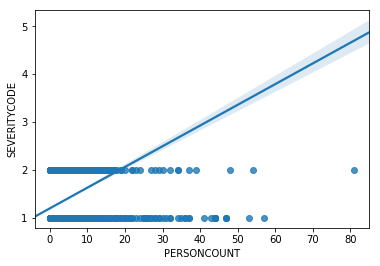

In [37]:
sns.regplot('PERSONCOUNT', 'SEVERITYCODE', data = df)

The next section is a look at the numbers on a map

In [38]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [39]:
latitude = 47.6
longitude = -122.3

map_seattle = folium.Map(location = [latitude, longitude], zoom_start = 12)
map_seattle

The data set is very large and will make for a messy map, we will have to break it down to smaller data set to vizualize.

In [40]:
from datetime import date
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['year'], df['month'], df['weekday'] = df['INCDTTM'].dt.year, df['INCDTTM'].dt.month, df['INCDTTM'].dt.weekday
df.dtypes

SEVERITYCODE              int64
X                       float64
Y                       float64
ADDRTYPE                 object
COLLISIONTYPE            object
PERSONCOUNT               int64
VEHCOUNT                  int64
INCDTTM          datetime64[ns]
UNDERINFL                object
WEATHER                  object
ROADCOND                 object
LIGHTCOND                object
HITPARKEDCAR             object
year                      int64
month                     int64
weekday                   int64
dtype: object

In [41]:
df_year = df[(df['year'] == 2019)]
df_year.shape

(8675, 16)

In [42]:
from folium import plugins
map_seattle = folium.Map(location = [latitude, longitude], zoom_start = 12)
incidents = plugins.MarkerCluster().add_to(map_seattle)

for lat, long, label, in zip(df_year.Y, df_year.X, df_year.SEVERITYCODE):
    folium.Marker(
        location = [lat, long],
        icon = None,
        #popup = label
    ).add_to(incidents)
    
map_seattle

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: Second argument 'Y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  app.launch_new_instance()


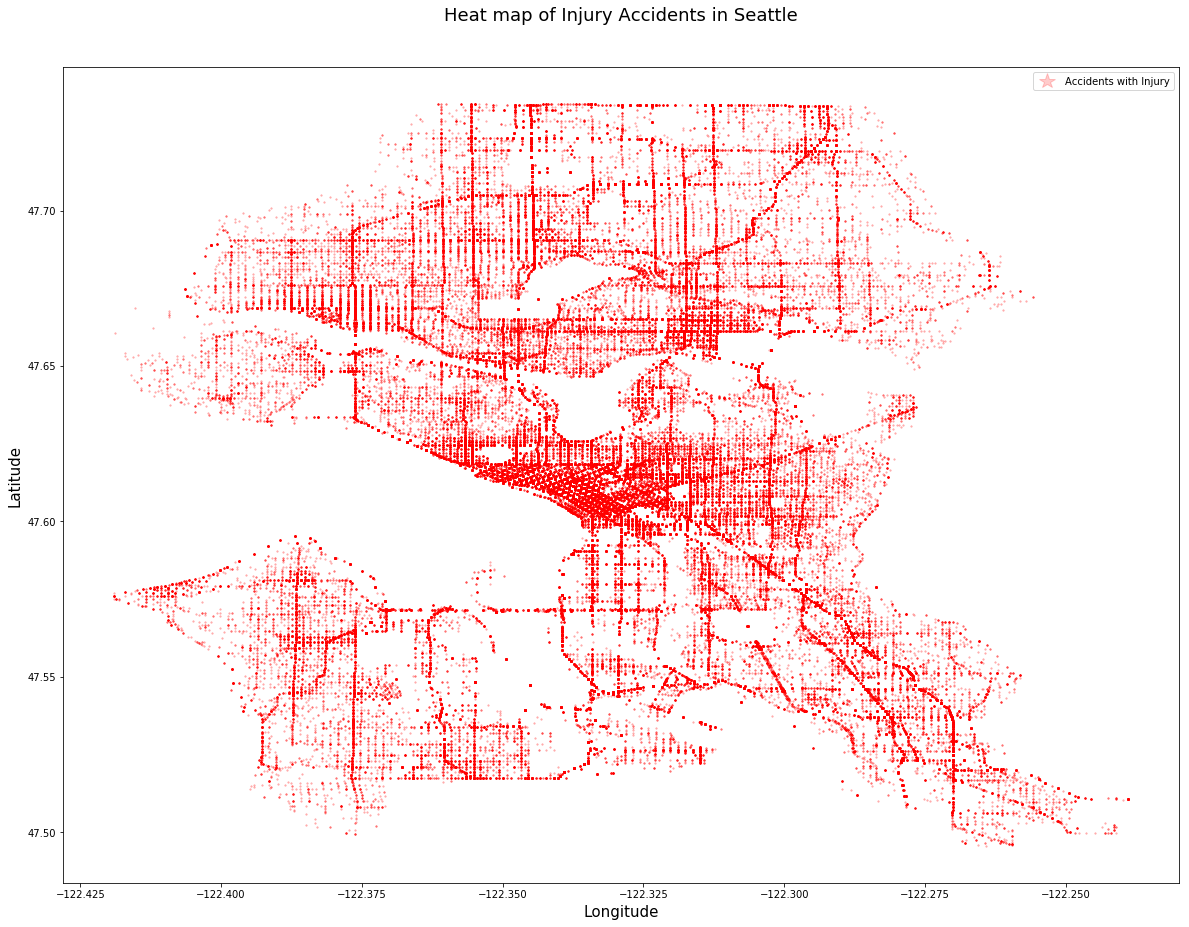

In [43]:
map_data = df[df['SEVERITYCODE']==2]
plt.figure(figsize = (20, 15))
plt.plot('X', 'Y', data = df, linestyle ='', marker = '*', markersize = 2, color = 'red', alpha = 0.2, label = 'Accidents with Injury')
plt.xlabel('Longitude', size = 15, labelpad = 5)
plt.ylabel('Latitude', size = 15, labelpad = 5)
plt.title('Heat map of Injury Accidents in Seattle', size = 18, y = 1.05)
plt.legend(markerscale = 8)
plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: Second argument 'Y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  app.launch_new_instance()


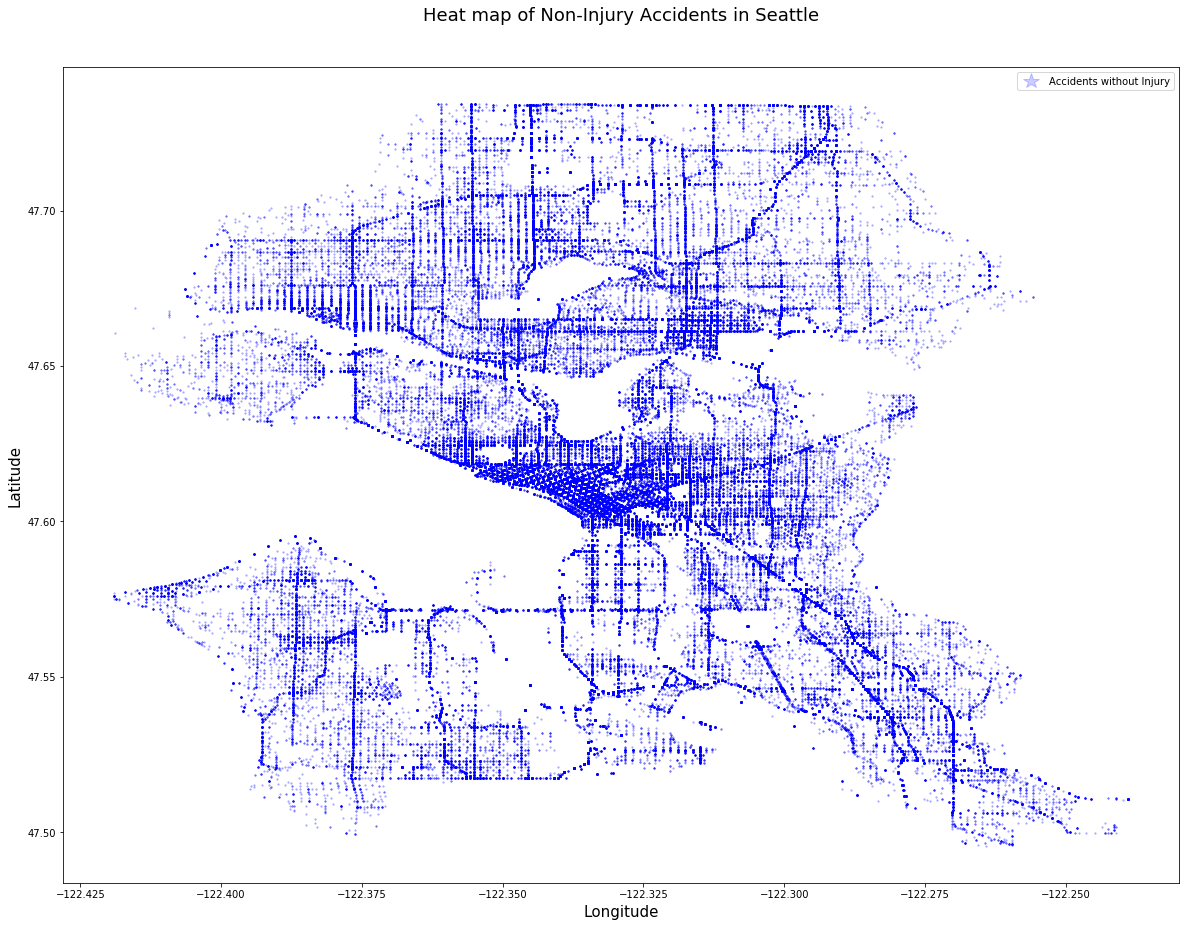

In [44]:
map_data = df[df['SEVERITYCODE']==1]
plt.figure(figsize = (20, 15))
plt.plot('X', 'Y', data = df, linestyle ='', marker = '*', markersize = 2, color = 'blue', alpha = 0.2, label = 'Accidents without Injury')
plt.xlabel('Longitude', size = 15, labelpad = 5)
plt.ylabel('Latitude', size = 15, labelpad = 5)
plt.title('Heat map of Non-Injury Accidents in Seattle', size = 18, y = 1.05)
plt.legend(markerscale = 8)
plt.show()

Now that the data has been visualized, time to prepare the data set for exploration.

In [45]:
df.dtypes

SEVERITYCODE              int64
X                       float64
Y                       float64
ADDRTYPE                 object
COLLISIONTYPE            object
PERSONCOUNT               int64
VEHCOUNT                  int64
INCDTTM          datetime64[ns]
UNDERINFL                object
WEATHER                  object
ROADCOND                 object
LIGHTCOND                object
HITPARKEDCAR             object
year                      int64
month                     int64
weekday                   int64
dtype: object

The data set needs to be transformed. The object types need to by converted to string and then to interger.

In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()
df['LIGHTCOND'] = le.fit_transform(df['LIGHTCOND'].map(str))
df["ADDRTYPE"] = le.fit_transform(df["ADDRTYPE"].map(str))
df["COLLISIONTYPE"] = le.fit_transform(df["COLLISIONTYPE"].map(str))
df["UNDERINFL"] = le.fit_transform(df["UNDERINFL"].map(str))
df["WEATHER"] = le.fit_transform(df["WEATHER"].map(str))
df["ROADCOND"] = le.fit_transform(df["ROADCOND"].map(str))
df["HITPARKEDCAR"] = le.fit_transform(df["HITPARKEDCAR"].map(str))


In [48]:
df.dtypes

SEVERITYCODE              int64
X                       float64
Y                       float64
ADDRTYPE                  int64
COLLISIONTYPE             int64
PERSONCOUNT               int64
VEHCOUNT                  int64
INCDTTM          datetime64[ns]
UNDERINFL                 int64
WEATHER                   int64
ROADCOND                  int64
LIGHTCOND                 int64
HITPARKEDCAR              int64
year                      int64
month                     int64
weekday                   int64
dtype: object

In [49]:
df.drop(['INCDTTM'], axis = 1, inplace = True)
df.head()

SEVERITYCODE           X          Y  ADDRTYPE  COLLISIONTYPE  PERSONCOUNT  \
0             2 -122.323148  47.703140         1              0            2   
1             1 -122.347294  47.647172         0              9            2   
2             1 -122.334540  47.607871         0              5            4   
3             1 -122.334803  47.604803         0              4            3   
4             2 -122.306426  47.545739         1              0            2   

   VEHCOUNT  UNDERINFL  WEATHER  ROADCOND  LIGHTCOND  HITPARKEDCAR  year  \
0         2          2        4         7          5             0  2013   
1         2          0        6         7          2             0  2006   
2         3          0        4         0          5             0  2004   
3         3          2        1         0          5             0  2013   
4         2          0        6         7          5             0  2004   

   month  weekday  
0      3        2  
1     12        2  
2     11        3  
3      3        4  
4      1        2

Time to look at the result target data

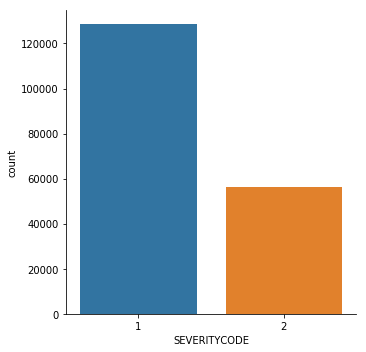

In [50]:
ax = sns.catplot(x = 'SEVERITYCODE', data = df, kind = 'count')
ax

From looking at the data set it needs to be normalized before processing


In [51]:
y = df['SEVERITYCODE']

In [52]:
X = df[['X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']]
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[ 0.24502085,  1.48740074,  1.3854185 , -1.60087834, -0.34423383,
         0.04745446,  0.34024832,  1.36044454,  0.3598049 , -0.19415148],
       [-0.55926638,  0.49174965, -0.72180355,  1.61512476, -0.34423383,
         0.04745446,  1.04931012,  1.36044454, -1.4065962 , -0.19415148],
       [-0.13442735, -0.20740455, -0.72180355,  0.18579005,  1.12834949,
         1.8449493 ,  0.34024832, -0.70374272,  0.3598049 , -0.19415148],
       [-0.14319774, -0.26199296, -0.72180355, -0.17154363,  0.39205783,
         1.8449493 , -0.72334437, -0.70374272,  0.3598049 , -0.19415148],
       [ 0.80202521, -1.31271386,  1.3854185 , -1.60087834, -0.34423383,
         0.04745446,  1.04931012,  1.36044454,  0.3598049 , -0.19415148]])

In [53]:
df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
ADDRTYPE           int64
COLLISIONTYPE      int64
PERSONCOUNT        int64
VEHCOUNT           int64
UNDERINFL          int64
WEATHER            int64
ROADCOND           int64
LIGHTCOND          int64
HITPARKEDCAR       int64
year               int64
month              int64
weekday            int64
dtype: object

The data set is ready to split into training and testing sets

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 3)
print('Training X =', X_train.shape, ' y =', y_train.shape)
print('Testing X =', X_test.shape, ' y =', y_test.shape)

Training X = (129206, 10)  y = (129206,)
Testing X = (55375, 10)  y = (55375,)


The following is the Modeling sets to use

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Decision Tree Model

In [68]:
dt_severity = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
dt_severity

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
dt_severity.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
pt_severity = dt_severity.predict(X_test)
pt_severity
print('Decision Tree accuracy is', metrics.accuracy_score(y_test, pt_severity))
print('F1 Score accuracy is', f1_score(y_test, pt_severity, average = 'weighted'))
print('Jaccard Similarity Score is', jaccard_similarity_score(y_test, pt_severity))

Decision Tree accuracy is 0.7524334085778781
F1 Score accuracy is 0.7190817586710851
Jaccard Similarity Score is 0.7524334085778781


In [70]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge

The following NEW packages will be INSTALLED:

    pydotplus: 2.0.2-pyhd1c1de3_3 conda-forge


pydotplus-2.0.2      | 23 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.14.2     |     pyh9f0ad1d_0          19 KB  conda-forge

The fo

In [72]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
dot_data = StringIO()
filename = "severity_tree.png"
featureNames = df.columns[2:12]
#featureNames = df['X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']
targetNames = df["SEVERITYCODE"].unique().tolist()
out = tree.export_graphviz(dt_severity, feature_names = featureNames, out_file = dot_data, class_names = np.unique(y_train), filled = True, special_characters = True, rotate = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize = (100,200))
plt.imshow(img, interpolation = 'nearest')

TypeError: must be str, not numpy.int64

## Logistic Regression Model

In [61]:
lr = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, y_train)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
yhat = lr.predict(X_test)
yhat

array([1, 1, 1, ..., 2, 1, 1])

In [63]:
yhat_proba = lr.predict_proba(X_test)
yhat_proba

array([[7.83211653e-01, 2.16788347e-01],
       [7.25742562e-01, 2.74257438e-01],
       [5.29132647e-01, 4.70867353e-01],
       ...,
       [7.08888722e-06, 9.99992911e-01],
       [7.79526344e-01, 2.20473656e-01],
       [6.50007629e-01, 3.49992371e-01]])

In [64]:
print('Logistic Regression accuracy is', metrics.accuracy_score(y_test, yhat))
print('F1 Score accuracy is', f1_score(y_test, yhat, average = 'weighted'))
print('Jaccard Similarity Score is', jaccard_similarity_score(y_test, yhat))
print('LogLoss is', log_loss(y_test, yhat_proba))

Logistic Regression accuracy is 0.7158645598194131
F1 Score accuracy is 0.6563652386708057
Jaccard Similarity Score is 0.7158645598194131
LogLoss is 0.5696148997474206


## Classification and Confusion Matrix

In [65]:
import itertools

def plot_confusion_matrix (cm,
                           classes,
                           normalize = False,
                           title = 'Confusion Matrix',
                           cmap = plt.cm.Blues
):
    if normalize:
        cm = cm.astype('float')/ cm.sum(axis = 1) [:, np.newaxis]
        print("Normailized Confusion Matrix")
    else:
        print('Confusion Matrix, without Normalization')
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment = "center",
                color = "white" if cm[i, j] > thresh else "black"
                )
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision = 2)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.73      0.95      0.82     38547
           2       0.61      0.18      0.27     16828

   micro avg       0.72      0.72      0.72     55375
   macro avg       0.67      0.56      0.55     55375
weighted avg       0.69      0.72      0.66     55375



Confusion Matrix, without Normalization
[[36675  1872]
 [13862  2966]]


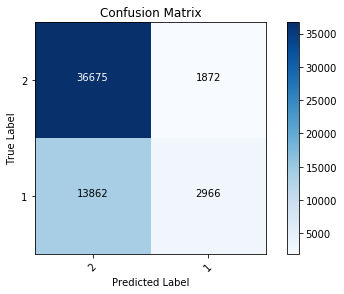

In [66]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = df["SEVERITYCODE"].unique().tolist(), normalize = False, title = 'Confusion Matrix')

# Results and Discussion

The above results are very good, scoring in the seventy percentile shows good modeling.

The Logistical Regression faired well, but not as well as the Decision Tree. The F1 score is almost six points less again this is still high for these types of models.

The question raised was can the severity of an accident be predicted? With the data set that was used the answer is yes with about a seventy percent accuracy. Sounds almost like a weather forecast? Interesting trends did debunk some preconceived notions, most accidents happen in dry, clear, daylight times. Then again that is probably when most people are driving. Most accidents happen in high population densities, like in this project that showed downtown to have the highest concentration. Most accidents are not under the influence of something. Collision type was the most interesting as the values very with no clear dominating value. This would be a great question to investigate further.

# Conclusion

It looks like accident severity can be predicted accurately. It is a matter of time as more data is collected and less no values enter a database, the better predictions can be made. Garbage in is garbage out. The tools used in this project is only a fraction of the powerful tools in data science. Many city and state transportation departments can use this data and concepts to predict what resources are needed and where to deploy these assets. 